10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   0.10s. Est. time left: 00:00:00:00
30.0%. Run time:   0.21s. Est. time left: 00:00:00:00
40.0%. Run time:   0.31s. Est. time left: 00:00:00:00
50.0%. Run time:   0.41s. Est. time left: 00:00:00:00
60.0%. Run time:   0.52s. Est. time left: 00:00:00:00
70.0%. Run time:   0.62s. Est. time left: 00:00:00:00
80.0%. Run time:   0.72s. Est. time left: 00:00:00:00
90.0%. Run time:   0.82s. Est. time left: 00:00:00:00
Total run time:   0.91s


(1, 11, 101)

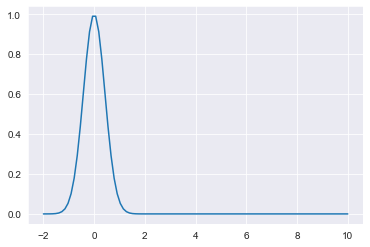

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')
from maxwellbloch import field, ob_atom
the_field = field.Field(
    coupled_levels=[[0, 1]],
    rabi_freq=1.0e-3,               # [2π MHz]
    rabi_freq_t_func='gaussian',
    rabi_freq_t_args={
        'ampl': 1.0,
        'centre': 0.0,              # [μs]
        'fwhm': 1.0},               # [μs]
    )
from maxwellbloch import t_funcs

tlist = np.linspace(-2, 10, 100)
plt.plot(tlist, t_funcs.gaussian(1)(tlist, args={ 'ampl_1': 1.0, 'centre_1': 0.0, 'fwhm_1': 1.0}));
the_atom = ob_atom.OBAtom(
    num_states=2,
    )
the_atom.fields.append(the_field)

from maxwellbloch import mb_solve
mbs = mb_solve.MBSolve(
    t_min=-2.0,                     # [μs]
    t_max=10.0,                     # [μs]
    t_steps=100,
    z_min=-0.5,                     # [cm]
    z_max=1.5,                      # [cm]
    z_steps=10,
    interaction_strengths=[0.1]     # [2π MHz /cm]
)
mbs.atom = the_atom
Omegas_zt, states_zt = mbs.mbsolve()

Omegas_zt.shape



In [7]:
states_zt.shape

(11, 101, 2, 2)

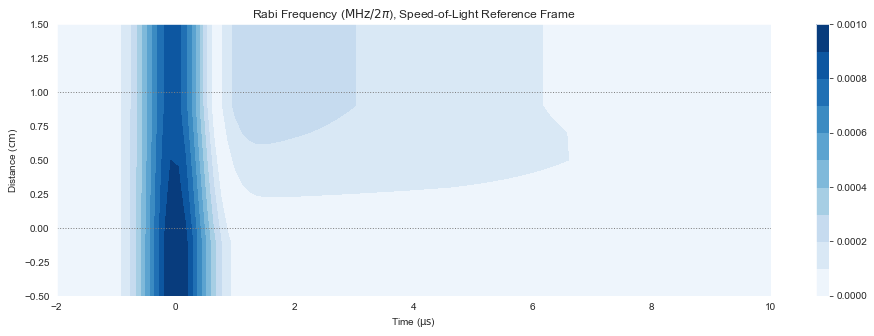

In [8]:
fig, ax = plt.subplots(figsize=(16, 5))
cmap_range = np.linspace(0.0, 1.0e-3, 11)
cf = ax.contourf(mbs.tlist, mbs.zlist,
                 np.abs(mbs.Omegas_zt[0]/(2*np.pi)),
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\mathrm{MHz} / 2\pi $), Speed-of-Light Reference Frame')
ax.set_xlabel('Time ($\mathrm{\mu s}$)')
ax.set_ylabel('Distance ($\mathrm{cm}$)')
for y in [0.0, 1.0]:
    ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.colorbar(cf);